In [ ]:
# Unzipping the data
!unzip -q dataset.zip

replace dataset/free/75fdbbb6-25ee-11eb-92ae-d03745aa5193.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# Importing the needed packages
import numpy as np
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Specifying the parameters of the input images, with respect to the Inception V3 specs
img_height=299
img_width=299

In [ ]:
# Constructing the model
base_model = InceptionV3(weights='imagenet', include_top=False) # Our base model is the Inception V3 without the final FC layers
x = base_model.output

# After the convnet we place a flatten and two dense layers in order to create a classification of our own
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # We use one neuron because our task is a binary classification task
model = Model(inputs=base_model.input, outputs=predictions)

# We freeze the layers of the base model, because we only want to train pur classifier.
for layer in base_model.layers:
    layer.trainable = False

# Compiling the model
model.compile(optimizer='adam', metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
# Data normalization and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, brightness_range=(0.5,0.9), zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_datagen.flow_from_directory("dataset", target_size=(img_height,img_width), class_mode="binary", batch_size=20, subset="training")
valid_data = valid_datagen.flow_from_directory("dataset", target_size=(img_height,img_width), class_mode="binary", batch_size=20, subset="validation")

Found 496 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [ ]:
# Regularization using eraly stopping
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

In [ ]:
# Training the network
history = model.fit(x=train_data, epochs=10, verbose=2, validation_data=valid_data, callbacks=callback)

Epoch 1/10
25/25 - 16s - loss: 0.5153 - accuracy: 0.8004 - val_loss: 0.4599 - val_accuracy: 0.8145
Epoch 2/10
25/25 - 15s - loss: 0.1915 - accuracy: 0.9375 - val_loss: 0.1850 - val_accuracy: 0.9194
Epoch 3/10
25/25 - 14s - loss: 0.1399 - accuracy: 0.9556 - val_loss: 0.1962 - val_accuracy: 0.9113
Epoch 4/10
25/25 - 14s - loss: 0.1238 - accuracy: 0.9556 - val_loss: 0.1196 - val_accuracy: 0.9435
Epoch 5/10
25/25 - 14s - loss: 0.1622 - accuracy: 0.9335 - val_loss: 0.1591 - val_accuracy: 0.9435
Epoch 6/10
25/25 - 15s - loss: 0.1667 - accuracy: 0.9274 - val_loss: 0.0728 - val_accuracy: 0.9677
Epoch 7/10
25/25 - 14s - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0839 - val_accuracy: 0.9597
Epoch 8/10
25/25 - 15s - loss: 0.0731 - accuracy: 0.9778 - val_loss: 0.0868 - val_accuracy: 0.9597


Training Loss: 0.0586
Training Accuracy: 0.9819
Validation Loss:  0.0728
Validation Accuracy:  0.9677


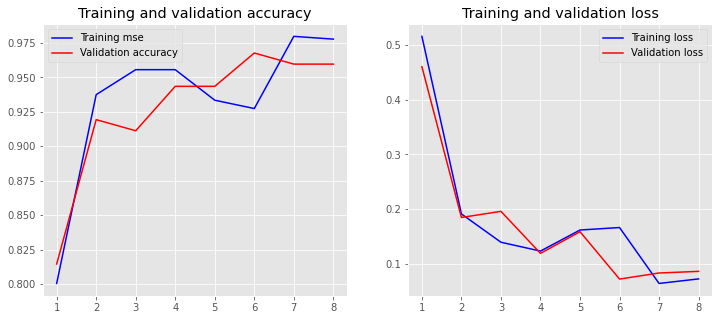

In [ ]:
# Visualizing the performance of the training

import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training mse')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


loss, accuracy = model.evaluate(train_data, verbose=False)
print("Training Loss: {:.4f}".format(loss))
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_data, verbose=False)
print("Validation Loss:  {:.4f}".format(loss))
print("Validation Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
# Saving the trained model
model.save("/content")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/assets
